In [25]:
##loading necessary libraries

import nlp_utils
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

In [4]:
!pip install nlp_utils

     |████████████████████████████████| 112 kB 4.4 MB/s 


In [6]:
## Reading the data
import csv
df = pd.read_csv('train_1.csv', error_bad_lines=False, engine='python')

Skipping line 1314: unexpected end of data


In [7]:
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1.0
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0.0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1.0
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1.0
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1.0
...,...,...,...,...,...
1307,1313,Starbucks Brand Crashes After Announcement of ...,Warner Todd Huston,The Starbucks Coffee brand has taken a major h...,0.0
1308,1314,New Report Blames Air Pollution For Deaths Of ...,Whitney Webb,Most recent environmental concerns regarding p...,1.0
1309,1315,"Norm Macdonald’s Often Funny, Always Fabulist ...",John Williams,"In May 2015, Norm Macdonald appeared on the ...",0.0
1310,1316,Trade Deficit Falls by 10% as U.S. Factories B...,John Carney,The U. S. trade deficit shrank by nearly 10 pe...,0.0


there are 5926 rows and 5 columns as seen above

In [8]:
## headline of the news
df['title'].sample(5)

142    U.N. Secretary General Complains That The ‘Mas...
865    “Donald Trump And The Rise Of White Identity I...
86     Trump Fans Rally Across the Nation to Support ...
722    How Voting Machines Are Programmed In Order To...
270    She Died And Came Back To Life With This Incre...
Name: title, dtype: object

In [9]:
## information regarding the headline
df['text'].sample(6)

585     November 22, 2016 -  Deena Stryker, Katehon - ...
892     Bundy Ranch occupiers acquitted on all counts ...
1077    British political parties have announced they ...
752     By VNN on November 4, 2016 Is winning the elec...
1117    This election remains more heated than any oth...
236     by PAUL FASSA \nYou might think I’m joking. Bu...
Name: text, dtype: object

In [10]:
df['label'].value_counts()
## dataframe contains 2970 'ones' and 2948 'zeros'

0.0    655
1.0    655
Name: label, dtype: int64

In [11]:
#getting the null values in the dataframe
df.isnull().sum()

id          0
title      37
author    135
text        3
label       2
dtype: int64

In [12]:
#removing the null values
df1=df.dropna()

In [44]:
df1.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [45]:
df1.reset_index(inplace=True)

In [46]:
df1

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1.0
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0.0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1.0
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1.0
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1.0
...,...,...,...,...,...,...
1133,1307,1313,Starbucks Brand Crashes After Announcement of ...,Warner Todd Huston,The Starbucks Coffee brand has taken a major h...,0.0
1134,1308,1314,New Report Blames Air Pollution For Deaths Of ...,Whitney Webb,Most recent environmental concerns regarding p...,1.0
1135,1309,1315,"Norm Macdonald’s Often Funny, Always Fabulist ...",John Williams,"In May 2015, Norm Macdonald appeared on the ...",0.0
1136,1310,1316,Trade Deficit Falls by 10% as U.S. Factories B...,John Carney,The U. S. trade deficit shrank by nearly 10 pe...,0.0


In [47]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138 entries, 0 to 1137
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   1138 non-null   int64  
 1   id      1138 non-null   int64  
 2   title   1138 non-null   object 
 3   author  1138 non-null   object 
 4   text    1138 non-null   object 
 5   label   1138 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 53.5+ KB


In [16]:
import re
import string

### Text cleaning



In [48]:

# remove all numbers with letters attached to them
alphanumeric = lambda x: re.sub(r'[^a-zA-Z]', ' ', str(x))

# convert all strings to lowercase 
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

# Remove all '\n' in the string and replace it with a space
remove_n = lambda x: re.sub("\n", " ", x)

# Remove all non-ascii characters 
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)



In [49]:
# Apply all the lambda functions wrote previously through .map on the comments column
df1['text'] = df1['text'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [55]:
df1['text'].iloc[1137]

' want to get this briefing by email  here s the     good evening  here s the latest      donald trump and hillary clinton clashed on terrorism  jobs  race relations and  above all  basic issues of honesty and trustworthiness during their first presidential debate  if you missed it  let us help you catch up with a few highlights and our rigorous fact checks of the candidates  assertions  and watch clips from the debate above           houston suffered through a mass shooting  the authorities said that a heavily armed man wearing a uniform emblazoned with a nazi symbol opened fire at random in a residential area near a mall  he injured nine people  two of them seriously  before the police shot and killed him  officials said he was a lawyer and had experienced troubles at his firm  in washington state  a    turkish immigrant confessed to killing of five people at a shopping mall on friday  his motive remains unknown           nationally  there was good news and bad news  the good news  m

In [58]:
len(df)

1312

##Removing stop words and stemming text

In [59]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(df1)):
    review = re.sub('[^a-zA-Z]', ' ', df1['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [21]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

##Splitting the data frame

In [60]:
y=df1['label']
y.head()

0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: label, dtype: float64

##train and test split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(df1['text'], y, test_size=0.30, random_state=101)
## We have split the data into 70 percent train and 30 percent test

##tfidf vectorizer

In [63]:
# Applying tfidf
tfidf_vect = TfidfVectorizer(stop_words = 'english',max_df=0.7)
tfidf_train = tfidf_vect.fit_transform(X_train)
tfidf_test = tfidf_vect.transform(X_test)

In [64]:
print(tfidf_test)

  (0, 32008)	0.03130709131885381
  (0, 31956)	0.015247962450694014
  (0, 31886)	0.038680907316412036
  (0, 31687)	0.017675046411997793
  (0, 31682)	0.011560153450747547
  (0, 31640)	0.013381282547156384
  (0, 31637)	0.015054785779556582
  (0, 31566)	0.09131291987121379
  (0, 31539)	0.019380741821843826
  (0, 31376)	0.034754579464813425
  (0, 31276)	0.014390644156972705
  (0, 31269)	0.011242093338563892
  (0, 31207)	0.0204960513296133
  (0, 31193)	0.02128562044889194
  (0, 31152)	0.025258217994454327
  (0, 31121)	0.01926896916182486
  (0, 31087)	0.015933253675884208
  (0, 31077)	0.034754579464813425
  (0, 31051)	0.01693132430684079
  (0, 31048)	0.025842951885827106
  (0, 31007)	0.023826300598760022
  (0, 30955)	0.019380741821843826
  (0, 30952)	0.04940957462011208
  (0, 30948)	0.014308432796765264
  (0, 30818)	0.039961412229233544
  :	:
  (341, 6971)	0.053057200366142226
  (341, 6910)	0.10623544444216083
  (341, 6770)	0.04492794216503315
  (341, 6312)	0.05982747332633934
  (341, 6084)	0

In [65]:
# feature names of 'tfidf_vectorizer'
print(tfidf_vect.get_feature_names()[-10:])

['zulu', 'zum', 'zur', 'zurrarse', 'zuzenak', 'zwar', 'zwei', 'zwzqj', 'zyaira', 'zyzs']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


##Count Vectorizer

In [66]:
count_vect = CountVectorizer(stop_words = 'english')
count_train = count_vect.fit_transform(X_train.values)
count_test = count_vect.transform(X_test.values)

In [67]:
print(count_test)

  (0, 69)	1
  (0, 81)	5
  (0, 91)	1
  (0, 169)	1
  (0, 306)	1
  (0, 309)	2
  (0, 310)	1
  (0, 322)	1
  (0, 325)	1
  (0, 342)	1
  (0, 376)	1
  (0, 422)	1
  (0, 486)	1
  (0, 517)	1
  (0, 569)	1
  (0, 571)	1
  (0, 613)	6
  (0, 625)	1
  (0, 767)	1
  (0, 904)	2
  (0, 1087)	1
  (0, 1244)	2
  (0, 1274)	1
  (0, 1421)	1
  (0, 1624)	1
  :	:
  (341, 24576)	1
  (341, 24742)	1
  (341, 24809)	2
  (341, 24905)	4
  (341, 25482)	1
  (341, 25495)	1
  (341, 26639)	1
  (341, 26729)	2
  (341, 26730)	1
  (341, 26895)	1
  (341, 27091)	1
  (341, 27184)	1
  (341, 27864)	1
  (341, 27945)	1
  (341, 29020)	1
  (341, 29546)	2
  (341, 29692)	1
  (341, 30881)	1
  (341, 31065)	1
  (341, 31091)	1
  (341, 31173)	1
  (341, 31269)	1
  (341, 31629)	7
  (341, 31715)	1
  (341, 31891)	1


In [68]:
# Feature names of 'count_vectorizer'
print(count_vect.get_feature_names()[0:10])

['aa', 'aardvark', 'aaron', 'aaronkleinshow', 'aarp', 'ab', 'aback', 'abacus', 'abadi', 'abandon']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


##Naive bayes model

#TF-idf vectorized

In [36]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [69]:
#Applying Naive Bayes
clf = MultinomialNB() 
clf.fit(tfidf_train, y_train)                       
pred = clf.predict(tfidf_test)                     
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
print(cm)

accuracy:   0.728
[[211   1]
 [ 92  38]]


In [72]:
print('Wrong predictions out of total')
print((y_test !=pred).sum(),'/',((y_test == pred).sum()+(y_test != pred).sum()))
print('Percentage accuracy: ',100*accuracy_score(y_test,pred))

Wrong predictions out of total
93 / 342
Percentage accuracy:  72.80701754385966


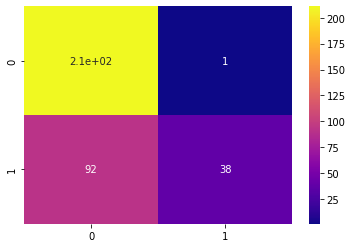

In [73]:
## Plotting confusion matrix for TF-Idf vectorizer
sns.heatmap(cm, cmap="plasma", annot=True)

#count vectorized


In [74]:
#Applying Naive Bayes
clf = MultinomialNB() 
clf.fit(count_train, y_train)                       
pred1 = clf.predict(count_test)                    
score = metrics.accuracy_score(y_test, pred1)
print("accuracy:   %0.3f" % score)
cm2 = metrics.confusion_matrix(y_test, pred1)
print(cm2)

accuracy:   0.865
[[199  13]
 [ 33  97]]


In [77]:
print('Wrong predictions out of total')
print((y_test !=pred1).sum(),'/',((y_test == pred1).sum()+(y_test != pred1).sum()))
print('Percentage accuracy: ',100*accuracy_score(y_test,pred1))

Wrong predictions out of total
46 / 342
Percentage accuracy:  86.54970760233918


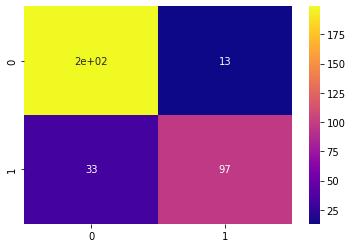

In [78]:
## Plotting confusion matrix for Count vectorizer.
sns.heatmap(cm2, cmap="plasma", annot=True)

##Random forest model

In [40]:
from sklearn.ensemble import RandomForestClassifier

#TF-Idf Vectorized

In [81]:
RF=RandomForestClassifier().fit(tfidf_train,y_train)
#predict on train 
train_preds2 = RF.predict(tfidf_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(y_train, train_preds2))

#predict on test
test_preds2 = RF.predict(tfidf_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(y_test, test_preds2))
print('-'*50)



#Confusion matrix
print("confusion_matrix train is: ", metrics.confusion_matrix(y_train, train_preds2))
print("confusion_matrix test is: ", metrics.confusion_matrix(y_test, test_preds2))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((y_test !=test_preds2).sum(),'/',((y_test == test_preds2).sum()+(y_test != test_preds2).sum()))
print('-'*50)

Model accuracy on train is:  1.0
Model accuracy on test is:  0.8713450292397661
--------------------------------------------------
confusion_matrix train is:  [[441   0]
 [  0 355]]
confusion_matrix test is:  [[205   7]
 [ 37  93]]
Wrong predictions out of total
--------------------------------------------------
44 / 342
--------------------------------------------------


#count vectorized

In [82]:
RF=RandomForestClassifier().fit(count_train,y_train)
#predict on train 
train_preds3 = RF.predict(count_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(y_train, train_preds3))

#predict on test
test_preds3 = RF.predict(count_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(y_test, test_preds3))
print('-'*50)



#Confusion matrix
print("confusion_matrix train is: ", metrics.confusion_matrix(y_train, train_preds3))
print("confusion_matrix test is: ", metrics.confusion_matrix(y_test, test_preds3))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((y_test !=test_preds3).sum(),'/',((y_test == test_preds3).sum()+(y_test != test_preds3).sum()))
print('-'*50)

Model accuracy on train is:  1.0
Model accuracy on test is:  0.8771929824561403
--------------------------------------------------
confusion_matrix train is:  [[441   0]
 [  0 355]]
confusion_matrix test is:  [[204   8]
 [ 34  96]]
Wrong predictions out of total
--------------------------------------------------
42 / 342
--------------------------------------------------


##KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
#fit the model on train data 
KNN = KNeighborsClassifier().fit(tfidf_train,y_train)
#predict on train 
train_preds4 = KNN.predict(tfidf_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(y_train, train_preds4))

#predict on test
test_preds4 = KNN.predict(tfidf_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(y_test, test_preds4))
print('-'*50)

Model accuracy on train is:  0.4547738693467337
Model accuracy on test is:  0.3830409356725146
--------------------------------------------------


In [85]:
#Confusion matrix
print("confusion_matrix train is: ", metrics.confusion_matrix(y_train, train_preds4))
print("confusion_matrix test is: ", metrics.confusion_matrix(y_test, test_preds4))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((y_test !=test_preds4).sum(),'/',((y_test == test_preds4).sum()+(y_test != test_preds4).sum()))

print('-'*50)

confusion_matrix train is:  [[  7 434]
 [  0 355]]
confusion_matrix test is:  [[  1 211]
 [  0 130]]
Wrong predictions out of total
--------------------------------------------------
211 / 342
--------------------------------------------------


In [86]:
#fit the model on train data 
KNN = KNeighborsClassifier().fit(count_train,y_train)
#predict on train 
train_preds5 = KNN.predict(count_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(y_train, train_preds5))

#predict on test
test_preds5 = KNN.predict(count_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(y_test, test_preds5))
print('-'*50)

Model accuracy on train is:  0.6507537688442211
Model accuracy on test is:  0.6023391812865497
--------------------------------------------------


In [88]:
#Confusion matrix
print("confusion_matrix train is: ", metrics.confusion_matrix(y_train, train_preds5))
print("confusion_matrix test is: ", metrics.confusion_matrix(y_test, test_preds5))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((y_test !=test_preds5).sum(),'/',((y_test == test_preds5).sum()+(y_test != test_preds5).sum()))

print('-'*50)

confusion_matrix train is:  [[179 262]
 [ 16 339]]
confusion_matrix test is:  [[ 85 127]
 [  9 121]]
Wrong predictions out of total
--------------------------------------------------
136 / 342
--------------------------------------------------
